
# Dense vector for word representations


##  Coding words as dense vectors

- Problems with one hot encoding of words
- Coding words as dense vectors


##  Word2Vec  Vectors

- What is word2vec
- How can we use word2vec

##  Text classification: Using dense vs one hot vectors

- Try in a real word example the performance of a classifier with these 2 preprocessing techniques.
   

In [1]:
import logging

## word2vec

http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W8vCSS2ZPOQ


https://medium.com/ml2vec/using-word2vec-to-analyze-reddit-comments-28945d8cee57

## Coding words as dense vectors

In [2]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [3]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/davidbuchaca1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidbuchaca1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
book_filenames = sorted(glob.glob("../data/books/*"))
book_filenames

['../data/books/got1.txt',
 '../data/books/got2.txt',
 '../data/books/got3.txt',
 '../data/books/got4.txt',
 '../data/books/got5.txt']

In [9]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading '../data/books/got1.txt'...
Corpus is now 1770659 characters long

Reading '../data/books/got2.txt'...
Corpus is now 4071041 characters long

Reading '../data/books/got3.txt'...
Corpus is now 6391405 characters long

Reading '../data/books/got4.txt'...
Corpus is now 8107945 characters long

Reading '../data/books/got5.txt'...
Corpus is now 9719485 characters long




#### Split corpus into sentences

In [10]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [11]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [12]:
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [13]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [14]:
len(sentences)

128868

In [15]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

Heraldic crest by Virginia Norey.
['Heraldic', 'crest', 'by', 'Virginia', 'Norey']


In [16]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,818,103 tokens


## Word2vec

#### Train word2vec

In [17]:
num_features = 300

# Minimum word count threshold.
min_word_count = 0

# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 5

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

seed = 1

#optional Training algorithm: 1 for skip-gram; otherwise CBOW
sg = 1


In [18]:
word2vec = w2v.Word2Vec(
    sg=sg,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling)

In [19]:
word2vec.build_vocab(sentences, keep_raw_vocab=True)

In [20]:
word2vec.corpus_count

128868

In [21]:
#print("Word2Vec vocabulary length:", len(word2vec.vocab))

In [22]:
word2vec.vocabulary

In [23]:
len(word2vec.vocabulary.raw_vocab)

29026

#### Train word2vec

```

ValueError: You must specify either total_examples or total_words, for proper job parameters updationand progress calculations. The usual value is total_examples=model.corpus_count.

```

In [24]:
total_examples = len(sentences)
total_examples

128868

In [25]:
%%time
word2vec.train(sentences,
               epochs = 10,
               total_examples=total_examples)

CPU times: user 2min 14s, sys: 422 ms, total: 2min 14s
Wall time: 18.8 s


(14214065, 18181030)

#### inspect words

In [26]:
words = list(word2vec.wv.vocab)

In [27]:
len(words)

29026

In [28]:
vectors = list(word2vec.wv.vectors)

In [29]:
len(vectors)

29026

#### get vector of a word

In [30]:
word2vec.wv.get_vector("magic").shape

(300,)

#### Find most similar words to a query word

In [31]:
w = "Tyrion"
word2vec.wv.most_similar(positive=w, topn=5)

[('dwarf', 0.5135536193847656),
 ('Shae', 0.48633670806884766),
 ('Bronn', 0.4610660970211029),
 ('Jaime', 0.4573958218097687),
 ('Kevan', 0.4539468586444855)]

In [32]:
w = "sword"
word2vec.wv.most_similar(positive=w, topn=5)

[('longsword', 0.663896381855011),
 ('blade', 0.6510634422302246),
 ('hilt', 0.617021918296814),
 ('lance', 0.5683977603912354),
 ('unsheathed', 0.564386248588562)]

In [33]:
w = "arrow"
word2vec.wv.most_similar(positive=w, topn=5)

[('nocked', 0.6855807900428772),
 ('notched', 0.6368714570999146),
 ('aimed', 0.6071533560752869),
 ('quiver', 0.6024066209793091),
 ('loosed', 0.5984204411506653)]

#### cosine similarity  between words

In [34]:
word2vec.wv.similarity("magic","spell")

0.5621105360381055

In [35]:
word2vec.wv.similarity("magic","wizard")

0.45990315807601784

In [36]:
word2vec.wv.similarity("magic","stone")

0.2630065985697578

In [37]:
word2vec.wv.similarity("magic","Tyrion")

0.18750193579847518

In [38]:
word2vec.wv.similarity("sword","longsword")

0.663896400964368

In [39]:
word2vec.wv.similarity("sword","axe")

0.4708621346222889

In [40]:
word2vec.wv.similarity("sword","arrow")

0.3398952916698914

In [41]:
word2vec.wv.similarity("shoot","arrow")

0.4152185230912198

In [42]:
word2vec.wv.similarity("shoot","sword")

0.3432859956826143

#### Investigate this manually

In [43]:
magic = word2vec.wv.get_vector("magic")
stone = word2vec.wv.get_vector("stone")

def cosine_distance(w1,w2):
    return np.dot(w1,w2)/(np.linalg.norm(w1)*np.linalg.norm(w2))

In [44]:
cosine_distance(magic,stone)

0.26300663


#### save to disc

In [78]:
# foldername = "/home/trained_word2vec"
# modelname  = "word2vec.w2v"
# if not os.path.exists(foldername):
#     os.makedirs(foldername)
#     word2vec.save(os.path.join(foldername, modelname))
# else:
#     print("folder {} already exists".format(foldername))

In [79]:
#word2vec = w2v.Word2Vec.load(os.path.join(foldername, modelname))

#### Compress word vectors in 2d space

In [80]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0, n_iter=500)

In [81]:
word2vec.trainables.syn1neg.shape

(29026, 300)

In [82]:
all_word_vectors_matrix = word2vec.trainables.syn1neg

#### Train t-SNE, this could take a minute or two...


In [83]:
tsne.n_iter

500

In [84]:
%%time 
vectors_2d = tsne.fit_transform(vectors)

CPU times: user 13min 19s, sys: 9.32 s, total: 13min 28s
Wall time: 8min 51s


#### Plot 

In [85]:
#vectors_2d = all_word_vectors_matrix_2d

In [86]:
vectors_2d.shape, len(vectors)

((29026, 2), 29026)

In [87]:
points = pd.DataFrame(
    [(w, c[0], c[1]) for w,c in zip(words, vectors_2d)],
    columns=["word", "x", "y"]
)

In [88]:
sns.set_context("poster")

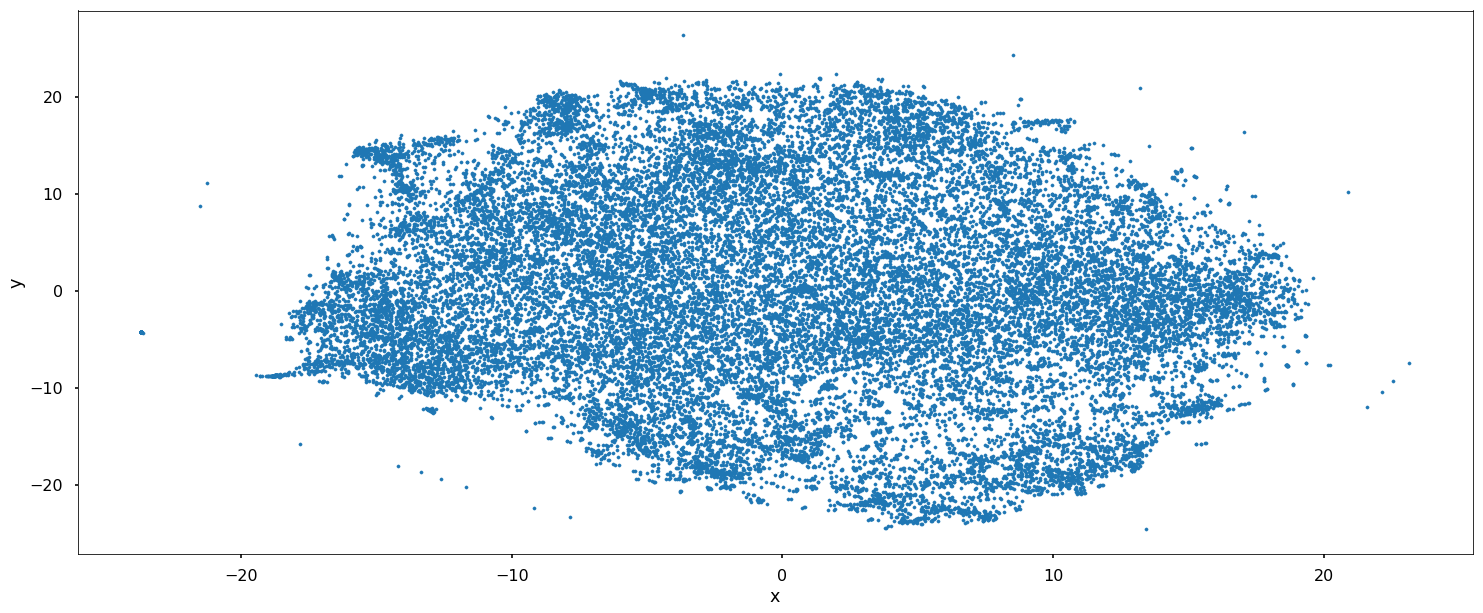

In [89]:
points.plot.scatter("x", "y", s=10, figsize=(25, 10))

In [90]:
points.dtypes

word     object
x       float64
y       float64
dtype: object

#### Zooom in a region

In [91]:
def plot_region(x_bounds, y_bounds, delta=0.001):
    
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + delta, point.y + delta, point.word, fontsize=11)

#### People related to Kingsguard ended up together


In [92]:
x_bounds=(-2.0, -1.0) 
y_bounds=(-0.5, 0.5)

slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])]

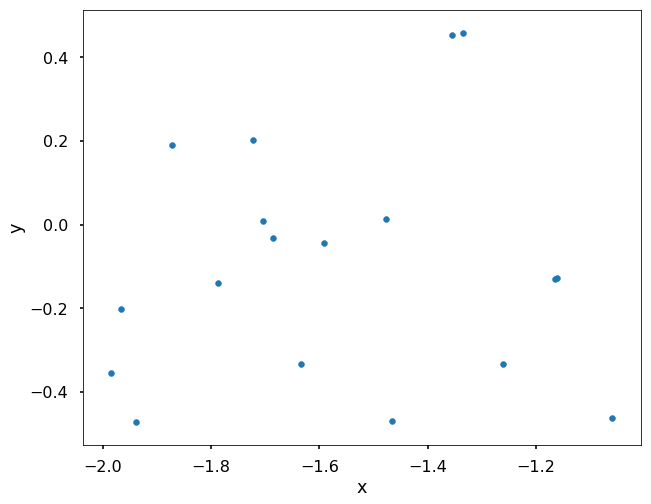

In [93]:
slice.plot.scatter("x", "y", s=35, figsize=(10, 8))

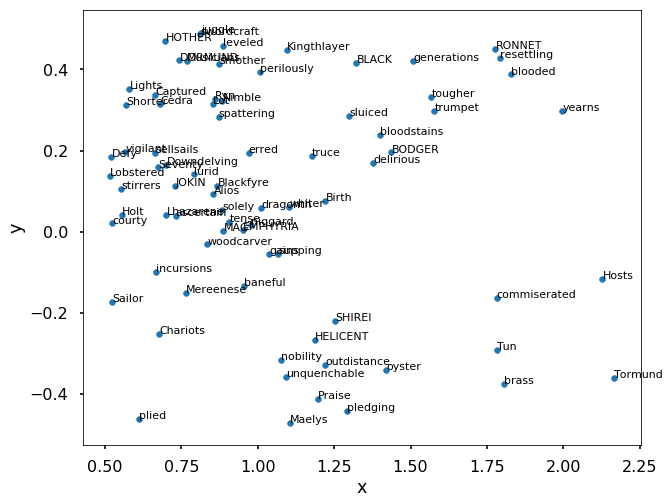

In [103]:
plot_region(x_bounds=(0.5, 2.2), y_bounds=(-0.5, 0.5))

#### Linear relationships between word pairs


In [104]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = word2vec.wv.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [105]:
nearest_similarity_cosmul("Stark", "Winterfell", "Riverrun")
nearest_similarity_cosmul("Jaime", "sword", "wine")
nearest_similarity_cosmul("Arya", "Nymeria", "dragons");

Stark is related to Winterfell, as Tully is related to Riverrun
Jaime is related to sword, as drank is related to wine
Arya is related to Nymeria, as dwarfs is related to dragons


#### Plot nearby a word

In [106]:
word2vec.wv.vocab['Stark'].__dict__

{'count': 1192, 'index': 204, 'sample_int': 4294967296}

In [107]:
tsne.embedding_.shape

(29026, 2)

In [108]:
tsne.embedding_[204][1] + 0.5

-8.073555946350098

In [110]:
#plot_region(x_bounds=tsne.embedding_[204],
#            y_bounds=(tsne.embedding_[204][1] -0.1, tsne.embedding_[204][1] + 0.1))


##  Text classification with word vectors 

Exercise: Use the notebooks from day 1 and day 2 with word vectors.

Train a classifier for the 20newsgroup dataset using word vectors as input to the classifier.